In [75]:
%matplotlib inline
import pandas as pd
import os.path

local = False

data_set_url = '/nethome/kkrishnan8/multi-sensor-data/data/raw/PEACHData/'
if local:
    data_set_url = '/Users/koushikkrishnan/Documents/CODE/multi-sensor-data/data/raw/PEACHData/'

user_profiles = pd.read_csv(os.path.join(data_set_url, 'User Profiles/up_explicit_data.csv'))
body_temp = pd.read_csv(os.path.join(data_set_url, 'IoT/PEACH_bodyTempLog_1Q2015.csv'), parse_dates=['DateTime'])
heart_rate = pd.read_csv(os.path.join(data_set_url, 'IoT/PEACH_heartRateLog_1Q2015.csv'), parse_dates=['DateTime'])
sleep_quality = pd.read_csv(os.path.join(data_set_url, 'IoT/PEACH_sleepQualityLog_1Q2015.csv'), parse_dates=['DateTime'])

body_temp = body_temp[['UserId', 'Body_Temperature']]
increased_heart_rate = heart_rate[['UserId', 'Increased_Heart_Rate']]
resting_heart_rate = heart_rate[['UserId', 'User_Resting_Heart_Rate']]
sleep_quality = sleep_quality[['UserId', 'Sleep_Quality_Value']]

avg_body_temp_by_user = body_temp.groupby(['UserId']).mean()
avg_increased_heart_rate = increased_heart_rate.groupby(['UserId']).mean()
avg_resting_heart_rate = resting_heart_rate.groupby(['UserId']).mean()
avg_sleep_quality = sleep_quality.groupby(['UserId']).mean()

avg_body_temp_by_user.reset_index(level=0, inplace=True)
avg_increased_heart_rate.reset_index(level=0, inplace=True)
avg_resting_heart_rate.reset_index(level=0, inplace=True)
avg_sleep_quality.reset_index(level=0, inplace=True)

In [80]:
avg_increased_heart_rate.plot?

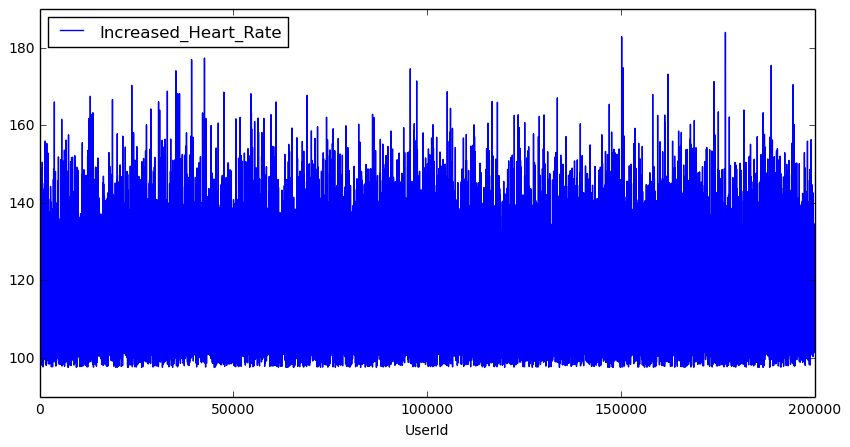

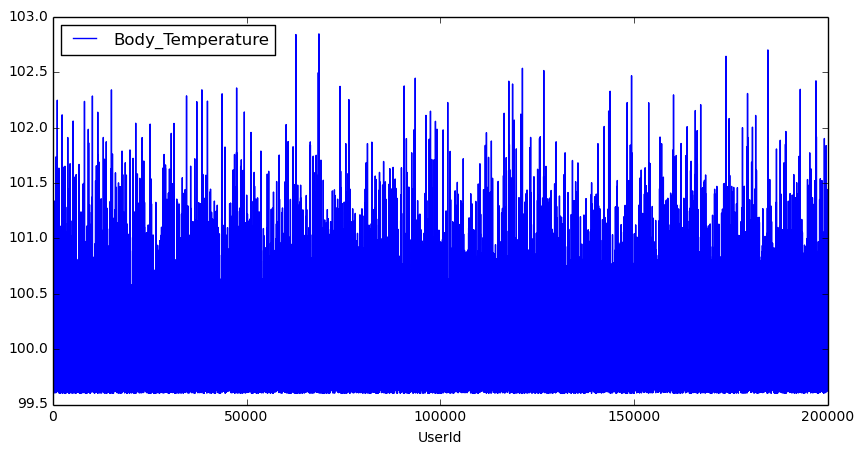

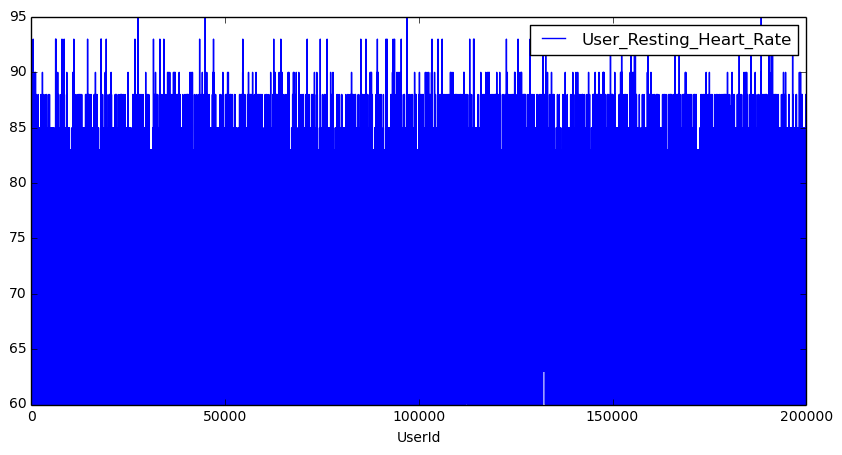

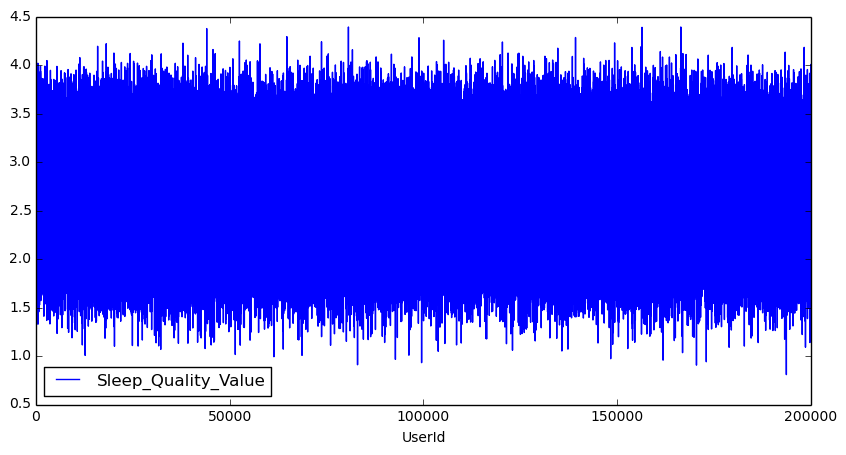

In [81]:
avg_body_temp_by_user.plot(figsize=(10, 5), x='UserId', y='Body_Temperature')
avg_increased_heart_rate.plot(figsize=(10, 5), x='UserId', y='Increased_Heart_Rate')
avg_resting_heart_rate.plot(figsize=(10, 5), x='UserId', y='User_Resting_Heart_Rate')
avg_sleep_quality.plot(figsize=(10, 5), x='UserId', y='Sleep_Quality_Value')

In [69]:
from sklearn.cluster import KMeans

# we will now try to see if we can cluster the data to find any patterns

avg_body_temp_by_user.reset_index(level=0, inplace=True)
# first we need to vectorize the data



In [105]:
body_temp_dict = avg_body_temp_by_user.T.to_dict()
inc_hr_dict = avg_increased_heart_rate.T.to_dict()
rest_hr_dict = avg_resting_heart_rate.T.to_dict()
sleep_dict = avg_sleep_quality.T.to_dict()

In [ ]:
import numpy as np
data = np.zeros((200000, 3))